<a id='part1'></a>
## Part 3 - Linear Regression:

In [802]:
#I (We) certify that the code and data in this assignment were generated independently, using only the tools and resources defined in the course and that I (we) did not receive any external help, coaching or contributions during the production of this work.

In [803]:
import numpy as np
from numpy import random 
import pandas as pd
import matplotlib.pyplot as plt

In [804]:
#Reading and prnting the Penguin DataSet :
dataframe = pd.read_csv('penguins.csv',low_memory=False)
print("Dataset: Penguins")
dataframe

Dataset: Penguins


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [805]:
#Converting features to Categorical:
dataframe["species"] = dataframe["species"].astype('category')
dataframe["island"] = dataframe["island"].astype('category')
dataframe["sex"] = dataframe["sex"].astype('category')
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            344 non-null    category
 1   island             344 non-null    category
 2   bill_length_mm     342 non-null    float64 
 3   bill_depth_mm      342 non-null    float64 
 4   flipper_length_mm  342 non-null    float64 
 5   body_mass_g        342 non-null    float64 
 6   sex                333 non-null    category
 7   year               344 non-null    int64   
dtypes: category(3), float64(4), int64(1)
memory usage: 14.9 KB


In [806]:
#Normalizing non-categorical features:
dataframe["bill_length_mm"] = (dataframe["bill_length_mm"] - dataframe["bill_length_mm"].min()) / (dataframe["bill_length_mm"].max() - dataframe["bill_length_mm"].min())
dataframe["bill_depth_mm"] = (dataframe["bill_depth_mm"] - dataframe["bill_depth_mm"].min()) / (dataframe["bill_depth_mm"].max() - dataframe["bill_depth_mm"].min())
dataframe["flipper_length_mm"] = (dataframe["bill_length_mm"] - dataframe["bill_length_mm"].min()) / (dataframe["bill_length_mm"].max() - dataframe["bill_length_mm"].min())
dataframe["body_mass_g"] = (dataframe["body_mass_g"] - dataframe["body_mass_g"].min()) / (dataframe["body_mass_g"].max() - dataframe["body_mass_g"].min())
dataframe

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,0.254545,0.666667,0.254545,0.291667,male,2007
1,Adelie,Torgersen,0.269091,0.511905,0.269091,0.305556,female,2007
2,Adelie,Torgersen,0.298182,0.583333,0.298182,0.152778,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,0.167273,0.738095,0.167273,0.208333,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,0.861818,0.797619,0.861818,0.361111,male,2009
340,Chinstrap,Dream,0.414545,0.595238,0.414545,0.194444,female,2009
341,Chinstrap,Dream,0.636364,0.607143,0.636364,0.298611,male,2009
342,Chinstrap,Dream,0.680000,0.702381,0.680000,0.388889,male,2009


In [807]:
#Number of NA values in each column:
print("Number of NA values in each column:")
dataframe.isnull().sum(axis=0)

Number of NA values in each column:


species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [808]:
#Removing the number 
df1_main=dataframe.dropna()
df1_main

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,0.254545,0.666667,0.254545,0.291667,male,2007
1,Adelie,Torgersen,0.269091,0.511905,0.269091,0.305556,female,2007
2,Adelie,Torgersen,0.298182,0.583333,0.298182,0.152778,female,2007
4,Adelie,Torgersen,0.167273,0.738095,0.167273,0.208333,female,2007
5,Adelie,Torgersen,0.261818,0.892857,0.261818,0.263889,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,0.861818,0.797619,0.861818,0.361111,male,2009
340,Chinstrap,Dream,0.414545,0.595238,0.414545,0.194444,female,2009
341,Chinstrap,Dream,0.636364,0.607143,0.636364,0.298611,male,2009
342,Chinstrap,Dream,0.680000,0.702381,0.680000,0.388889,male,2009


In [809]:
#Choosing the target Y and Splitting dataset into Training and Testing
train=df1_main.sample(frac=0.8)
test=df1_main.drop(train.index)
y_train = train[train.columns[5]].to_numpy()
y_test = test[test.columns[5]].to_numpy()
x_train = train[train.columns[2:5]].to_numpy()
x_test = test[test.columns[2:5]].to_numpy()

In [810]:
y_train = np.reshape(y_train, (-1,1))
y_test = np.reshape(y_test, (-1,1))

In [811]:
#Shapes of X, Y -> Train and Test data set
print("Shape of X_train:",np.shape(x_train))
print("Shape of Y_train:",np.shape(y_train))
print("Shape of X_test:",np.shape(x_test))
print("Shape of Y_test:",np.shape(y_test))

Shape of X_train: (266, 3)
Shape of Y_train: (266, 1)
Shape of X_test: (67, 3)
Shape of Y_test: (67, 1)


In [812]:
class Linearregression:
    def ols(self,x,y):
        X=np.c_[np.ones(len(x)),x] 
        w_1=np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y)
        self.weights= w_1
        return self
    def predict(self,x):
        x=np.c_[np.ones((len(x),1)),x]
        y_pred=np.dot(x,self.weights)
        return y_pred

In [813]:
#Training the model
model = Linearregression()
model.ols(x_train, y_train)
#Testing the model
y_preds = model.predict(x_test)

In [814]:
model.weights

array([[ 0.33878104],
       [ 0.27931238],
       [-0.35438231],
       [ 0.27931238]])

In [815]:
#Calculating the sum of squared errors and the weight vector:
def mse(y_pred,y):
        mse=((y-y_pred)**2).mean()
        return mse 
m=mse(y_preds, y_test)
print("Calculated Sum of squarred errors: ",m)
print("The weight vector is: ")
print(model.weights)  

Calculated Sum of squarred errors:  0.02644172229581085
The weight vector is: 
[[ 0.33878104]
 [ 0.27931238]
 [-0.35438231]
 [ 0.27931238]]


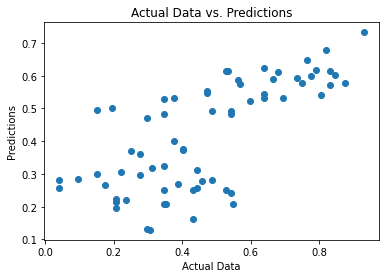

In [816]:
#Plotting the predictions vs the actual data:
figure, plot = plt.subplots()
plot.scatter(y_test, y_preds)
plot.set_ylabel('Predictions')
plot.set_xlabel('Actual Data')
plot.set_title('Actual Data vs. Predictions');

<a id='part1'></a>
## Part 4 - Ridge Regreession:

In [817]:
class Ridgeregression:        
    def ols(self,a,x,y):
        a=10
        x_bias = np.c_[np.ones((x.shape[0], 1)), x]
        self.x_bias = x_bias
        X=np.c_[np.ones(len(x)),x] 
        ai=np.identity(x_bias.shape[1])
        ai[0,0]=0
        a_i= a*ai
        wr_1=np.linalg.pinv((X.T.dot(X))+(a_i)).dot(X.T).dot(y)                           
        self.weights_r = wr_1
                           
    def predict(self, x):
        w_1=self.weights_r
        x=np.c_[np.ones((len(x),1)),x]
        yr_pred=np.dot(x,w_1)
        return yr_pred

In [818]:
model_r = Ridgeregression()
alpha_r=10
model_r.ols(alpha_r,x_train, y_train)
#Testing the model
yr_preds = model_r.predict(x_test)

In [819]:
np.shape(yr_preds)

(67, 1)

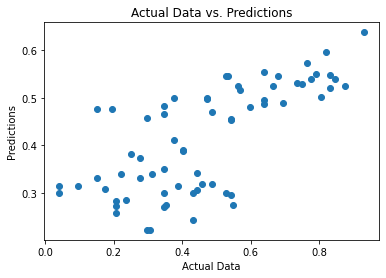

In [820]:
figure, plot = plt.subplots()
plot.scatter(y_test, yr_preds)
plot.set_ylabel('Predictions')
plot.set_xlabel('Actual Data')
plot.set_title('Actual Data vs. Predictions');

In [821]:
def mse(y_pred,y):
    yr=(y-yr_preds)**2
    w1=model_r.weights_r
    a=sum(yr)
    mse=0.5*(a)+(0.5*(10)*(w1.T).dot(w1))
    return mse
m=mse(yr_preds, y_test)
print("Calculated Sum of squarred errors: ",m)
print("The weight vector is: ")
print(model_r.weights_r) 

Calculated Sum of squarred errors:  [[2.21198627]]
The weight vector is: 
[[ 0.344841  ]
 [ 0.19887047]
 [-0.22479942]
 [ 0.19887047]]
